In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [64]:
data = pd.read_csv(r'D:\Data Science\Intellipaat\Capstone Project\RetailStore.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [65]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [66]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [67]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [68]:
data.set_index(data['Date'], inplace=True)

In [69]:
data['Week'] = data['Date'].dt.week 
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [70]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
Date,,,,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
2010-02-12,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
2010-03-05,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,9,2012
2012-10-05,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40,10,2012
2012-10-12,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41,10,2012


## Outlier Detection and Treatment

In [71]:
num_cols = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']

In [72]:
new_df = data[num_cols].copy()

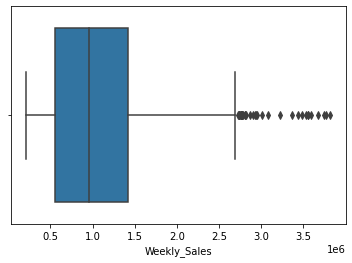

In [73]:
sns.boxplot(data['Weekly_Sales'])
plt.show()

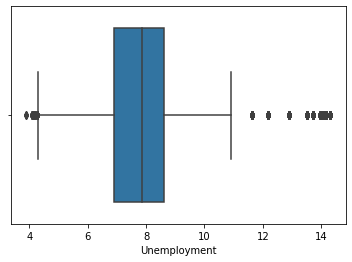

In [74]:
sns.boxplot(data['Unemployment'])
plt.show()

In [75]:
from scipy import stats
data = data[(np.abs(stats.zscore(new_df)) < 2.5).all(axis=1)]

In [76]:
data.shape

(6049, 11)

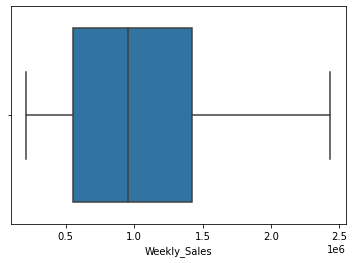

In [77]:
sns.boxplot(data['Weekly_Sales'])
plt.show()

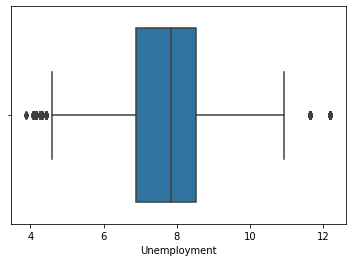

In [78]:
sns.boxplot(data['Unemployment'])
plt.show()

## Data Visualizations

### Average Monthly Sales

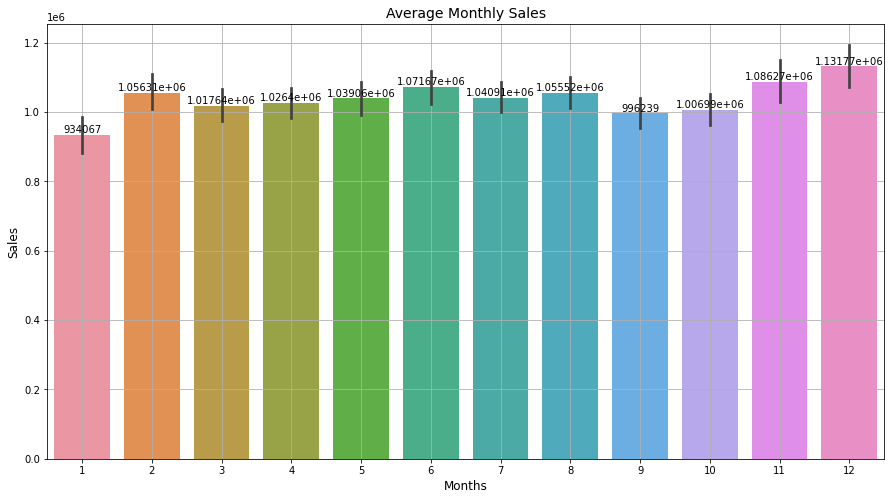

In [79]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=data['Month'],y=data['Weekly_Sales'])

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Months', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Average Monthly Sales', fontsize=14)
plt.savefig('P1-Average Monthly Sales.png')
plt.grid()

### Monthly Sales Each Year

In [80]:
Monthly_Sales = pd.pivot_table(index='Year', columns='Month', values='Weekly_Sales', data=data, aggfunc='sum')
Monthly_Sales

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.731878e+08,1.710599e+08,2.157129e+08,1.762177e+08,1.814865e+08,2.199126e+08,1.772900e+08,1.671630e+08,2.049394e+08,1.716546e+08,2.126920e+08
2011,1.472913e+08,1.685340e+08,1.673079e+08,2.131651e+08,1.711692e+08,1.791118e+08,2.171255e+08,1.780078e+08,2.080930e+08,1.725975e+08,1.781256e+08,2.128528e+08
2012,1.674892e+08,1.896006e+08,2.315097e+08,1.838854e+08,1.887665e+08,2.406103e+08,1.875095e+08,2.368508e+08,1.806455e+08,1.843617e+08,NaN,NaN


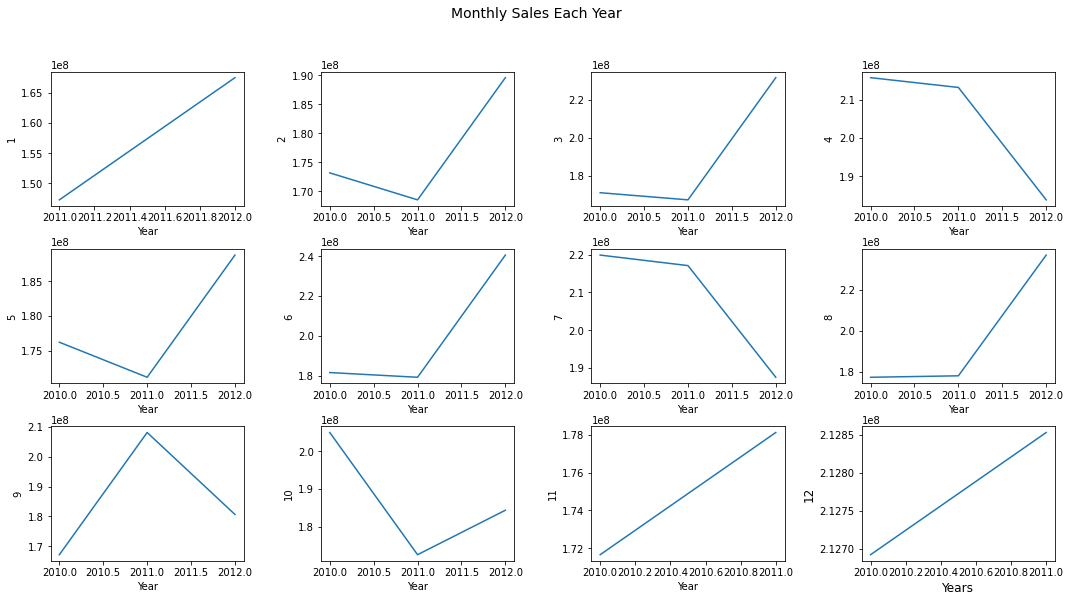

In [81]:
fig, axes = plt.subplots(3,4,figsize=(18,9))
plt.suptitle('Monthly Sales Each Year', fontsize=14)
m=1
for i in range(3):
    for j in range(4):
        sns.lineplot(ax=axes[i,j],data=Monthly_Sales[m])
        plt.subplots_adjust(wspace=0.4,hspace=0.32)
        plt.ylabel(m,fontsize=12)
        plt.xlabel('Years',fontsize=12)
        m+=1

plt.savefig('P1-Monthly Sales Each Year.png')
plt.show()

### Store Wise Average Weekly Sales

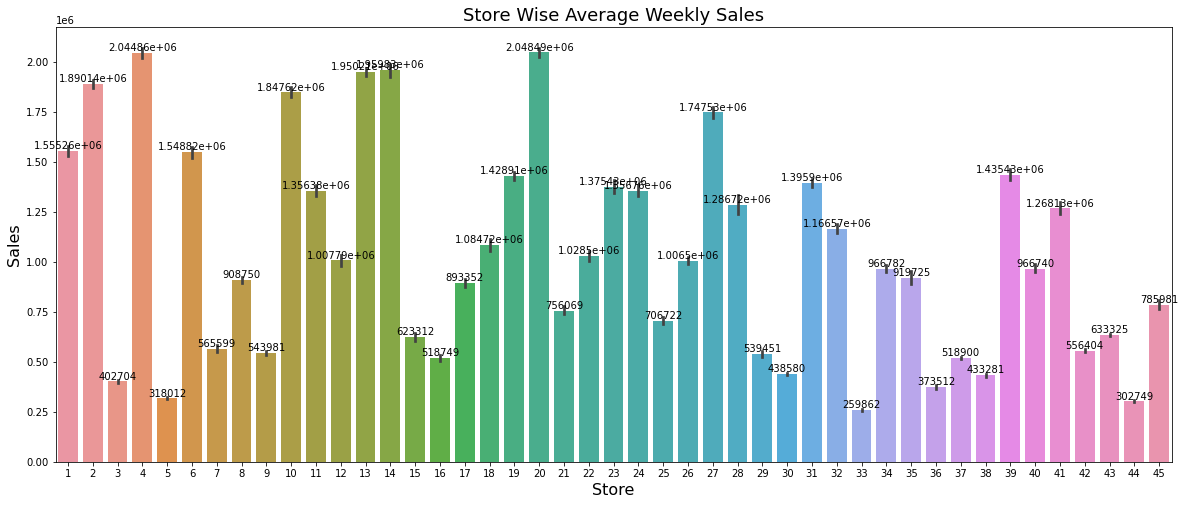

In [82]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x='Store',y='Weekly_Sales',data=data)

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Store Wise Average Weekly Sales', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('P1-Store Wise Average Weekly Sales.png')
plt.show()

### Holiday Distribution

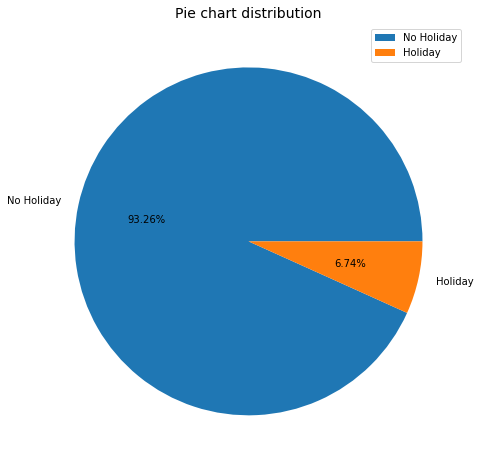

In [83]:
plt.figure(figsize=(8,8))
plt.pie(data['Holiday_Flag'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.savefig('P1-Holiday Distribution.png')
plt.show()

### Sales vs Temperature

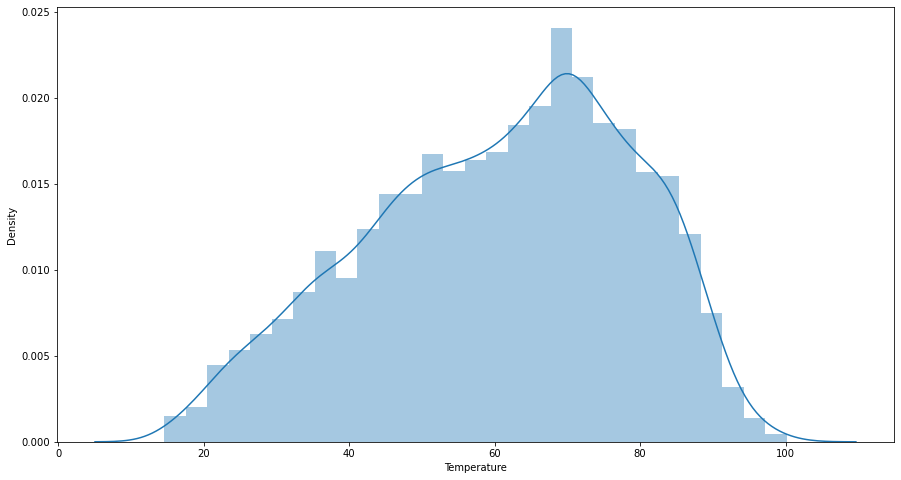

In [84]:
plt.figure(figsize=(15,8))
sns.distplot(data['Temperature'])
plt.savefig('P1-Temp Dist.png')
plt.show()

In [85]:
data_one = pd.get_dummies(data['Store'])
data_one

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-02-12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-02-19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-02-26,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-03-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2012-10-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2012-10-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
data = pd.concat([data, data_one], axis=1)
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,...,0,0,0,0,0,0,0,0,0,0
2010-02-12,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,...,0,0,0,0,0,0,0,0,0,0
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,...,0,0,0,0,0,0,0,0,0,0
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,...,0,0,0,0,0,0,0,0,0,0
2010-03-05,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,9,...,0,0,0,0,0,0,0,0,0,1
2012-10-05,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40,10,...,0,0,0,0,0,0,0,0,0,1
2012-10-12,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41,10,...,0,0,0,0,0,0,0,0,0,1


In [87]:
data.drop(columns=['Store','Date'], axis=1, inplace=True)
data

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,1,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,1,...,0,0,0,0,0,0,0,0,0,0
2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010,1,...,0,0,0,0,0,0,0,0,0,0
2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010,1,...,0,0,0,0,0,0,0,0,0,0
2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010,1,...,0,0,0,0,0,0,0,0,0,0
2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,9,2012,0,...,0,0,0,0,0,0,0,0,0,1
2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40,10,2012,0,...,0,0,0,0,0,0,0,0,0,1
2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41,10,2012,0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
norm_data = data[num_cols].copy()
norm_data

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,
2010-02-05,1643690.90,42.31,2.572,211.096358,8.106
2010-02-12,1641957.44,38.51,2.548,211.242170,8.106
2010-02-19,1611968.17,39.93,2.514,211.289143,8.106
2010-02-26,1409727.59,46.63,2.561,211.319643,8.106
2010-03-05,1554806.68,46.50,2.625,211.350143,8.106
...,...,...,...,...,...
2012-09-28,713173.95,64.88,3.997,192.013558,8.684
2012-10-05,733455.07,64.89,3.985,192.170412,8.667
2012-10-12,734464.36,54.47,4.000,192.327265,8.667


In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
minmax = MinMaxScaler()
for i in num_cols:
    arr = data[i]
    arr = np.array(arr)
    data[i] = minmax.fit_transform(arr.reshape(len(arr),1))
    
data

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,1,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.645014,0,0.324258,0.050100,0.840500,0.508787,5,2,2010,1,...,0,0,0,0,0,0,0,0,0,0
2010-02-12,0.644234,1,0.279855,0.038076,0.841941,0.508787,6,2,2010,1,...,0,0,0,0,0,0,0,0,0,0
2010-02-19,0.630742,0,0.296448,0.021042,0.842405,0.508787,7,2,2010,1,...,0,0,0,0,0,0,0,0,0,0
2010-02-26,0.539755,0,0.374737,0.044589,0.842707,0.508787,8,2,2010,1,...,0,0,0,0,0,0,0,0,0,0
2010-03-05,0.605025,0,0.373218,0.076653,0.843008,0.508787,9,3,2010,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,0.226381,0,0.587988,0.764028,0.651876,0.578358,39,9,2012,0,...,0,0,0,0,0,0,0,0,0,1
2012-10-05,0.235505,0,0.588105,0.758016,0.653427,0.576312,40,10,2012,0,...,0,0,0,0,0,0,0,0,0,1
2012-10-12,0.235959,0,0.466347,0.765531,0.654977,0.576312,41,10,2012,0,...,0,0,0,0,0,0,0,0,0,1


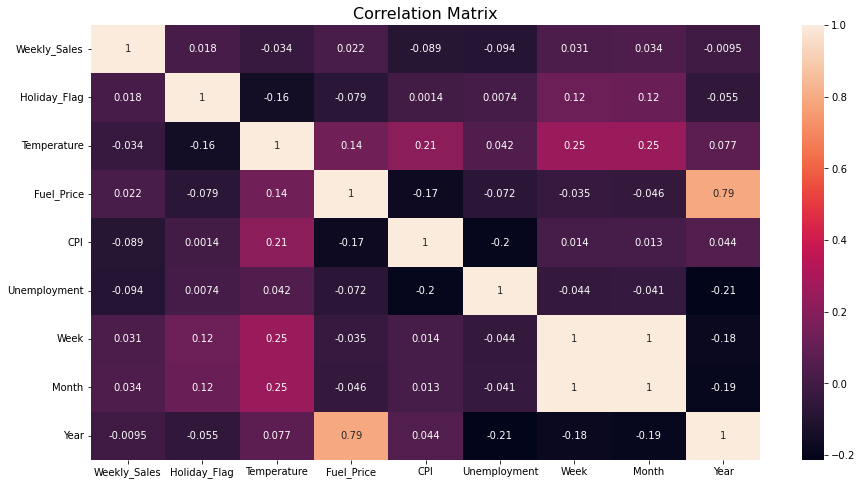

In [93]:
corr_cols = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'Month', 'Year']

plt.figure(figsize=(15,8))
corr = data[corr_cols].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.savefig('P1-Correlation Matrix.png')
plt.show()

In [94]:
data.drop(columns=['Month'], inplace=True)

In [95]:
data

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,1,2,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.645014,0,0.324258,0.050100,0.840500,0.508787,5,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
2010-02-12,0.644234,1,0.279855,0.038076,0.841941,0.508787,6,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
2010-02-19,0.630742,0,0.296448,0.021042,0.842405,0.508787,7,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
2010-02-26,0.539755,0,0.374737,0.044589,0.842707,0.508787,8,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
2010-03-05,0.605025,0,0.373218,0.076653,0.843008,0.508787,9,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,0.226381,0,0.587988,0.764028,0.651876,0.578358,39,2012,0,0,...,0,0,0,0,0,0,0,0,0,1
2012-10-05,0.235505,0,0.588105,0.758016,0.653427,0.576312,40,2012,0,0,...,0,0,0,0,0,0,0,0,0,1
2012-10-12,0.235959,0,0.466347,0.765531,0.654977,0.576312,41,2012,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
X = data.drop(['Weekly_Sales'], axis=1)
Y = data['Weekly_Sales']

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [99]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4839, 52)
(1210, 52)
(4839,)
(1210,)


## Linear Regression Model

In [101]:
lr = LinearRegression(normalize=False)
lr.fit(X_train, Y_train)

LinearRegression(normalize=False)

In [102]:
Y_pred = lr.predict(X_test)

In [116]:
print("LR_MAE:" , mean_absolute_error(Y_test, Y_pred))
print("LR_MSE:" , mean_squared_error(Y_test, Y_pred))
print("LR_RMSE:" , np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("LR_R2:" , explained_variance_score(Y_test, Y_pred))

LR_MAE: 0.038297206475187605
LR_MSE: 0.003446464453574787
LR_RMSE: 0.058706596337845945
LR_R2: 0.9445031248161317


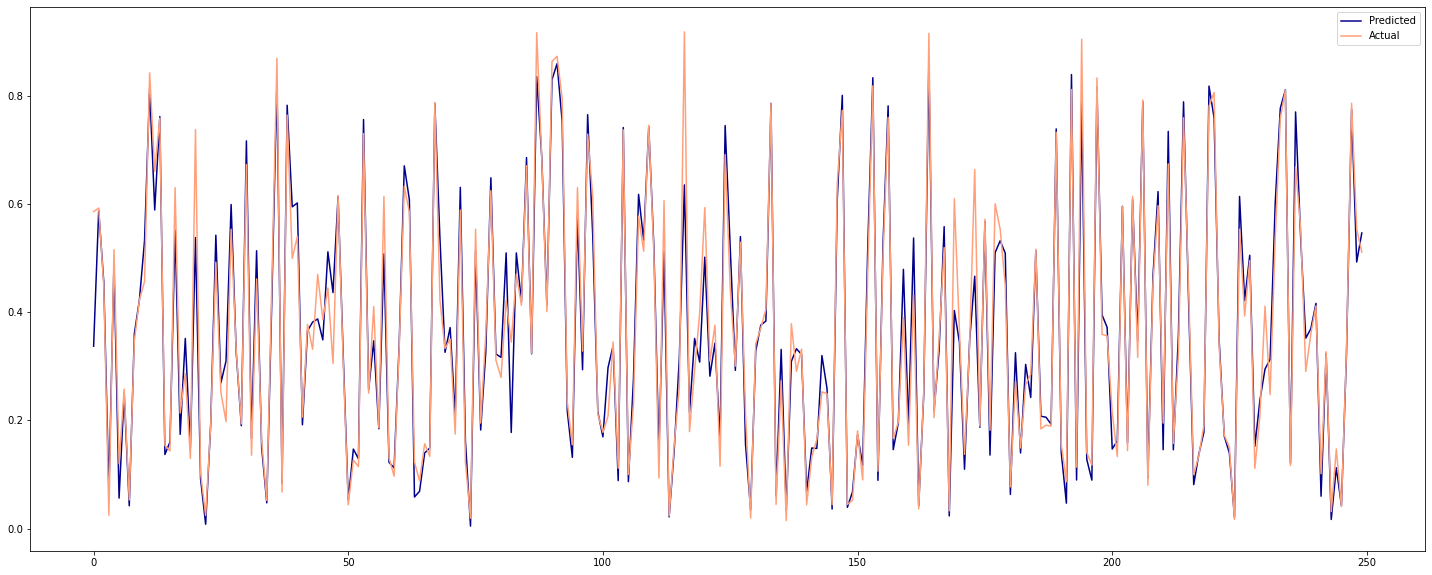

In [150]:
plt.figure(figsize=(25,10))
plt.plot(Y_pred[:250], label='Predicted', color='darkblue', linewidth = 1.5)
plt.plot(Y_test[:250].values, label='Actual', color='lightsalmon', linewidth = 1.5)
plt.legend(loc='best')
plt.savefig('P1-Linear Regression Prediction')
plt.show()

## Random Forest Regressor Model

In [115]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [117]:
Y_pred_rf = rf.predict(X_test)

In [118]:
print("RF_MAE:" , mean_absolute_error(Y_test, Y_pred_rf))
print("RF_MSE:" , mean_squared_error(Y_test, Y_pred_rf))
print("RF_RMSE:" , np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
print("RF_R2:" , explained_variance_score(Y_test, Y_pred_rf))

RF_MAE: 0.025212033602641584
RF_MSE: 0.0019795158050802102
RF_RMSE: 0.04449174985410453
RF_R2: 0.9680951294499227


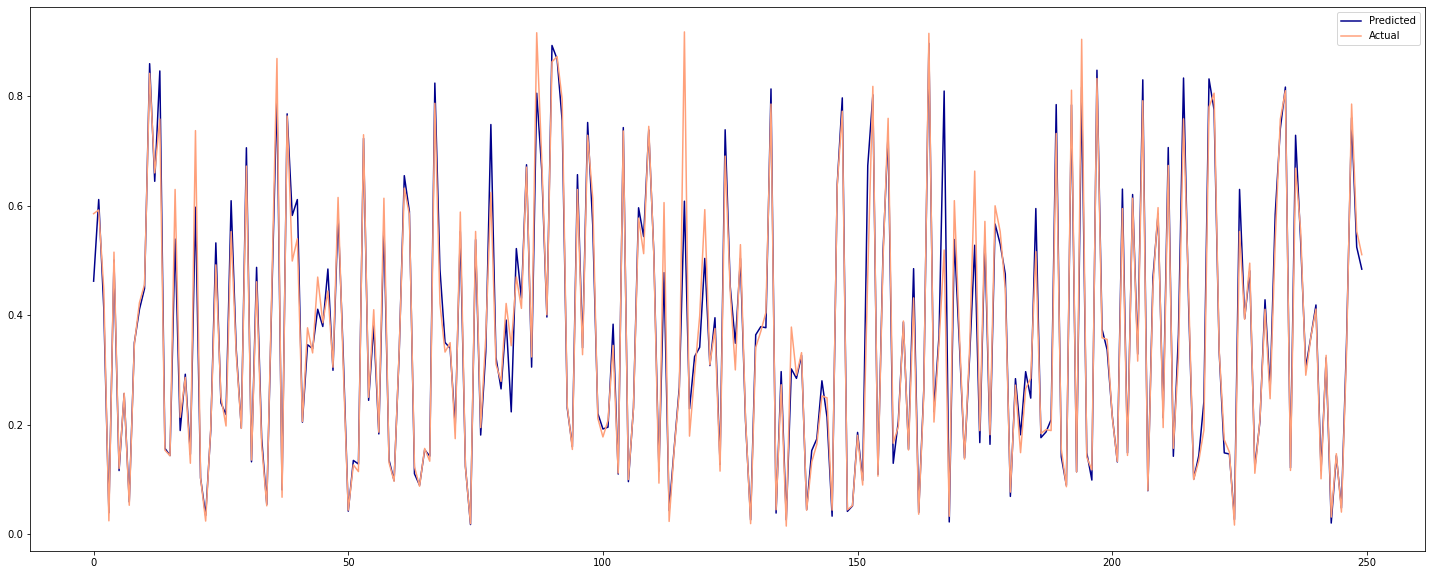

In [124]:
plt.figure(figsize=(25,10))
plt.plot(Y_pred_rf[:250], label='Predicted', color='darkblue', linewidth = 1.5)
plt.plot(Y_test[:250].values, label='Actual', color='lightsalmon', linewidth = 1.5)
plt.legend(loc='best')
plt.savefig('P1-Random Forest Regressor Prediction')
plt.show()

## K-Neighbours Regressor Model

In [146]:
knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(X_train, Y_train)

KNeighborsRegressor(leaf_size=70, n_neighbors=1)

In [147]:
Y_pred_knr = knr.predict(X_test)

In [148]:
print("KNR_MAE:" , mean_absolute_error(Y_test, Y_pred_knr))
print("KNR_MSE:" , mean_squared_error(Y_test, Y_pred_knr))
print("KNR_RMSE:" , np.sqrt(mean_squared_error(Y_test, Y_pred_knr)))
print("KNR_R2:" , explained_variance_score(Y_test, Y_pred_knr))

KNR_MAE: 0.03805794140661158
KNR_MSE: 0.0072418343166157995
KNR_RMSE: 0.08509896777644133
KNR_R2: 0.8833553833129612


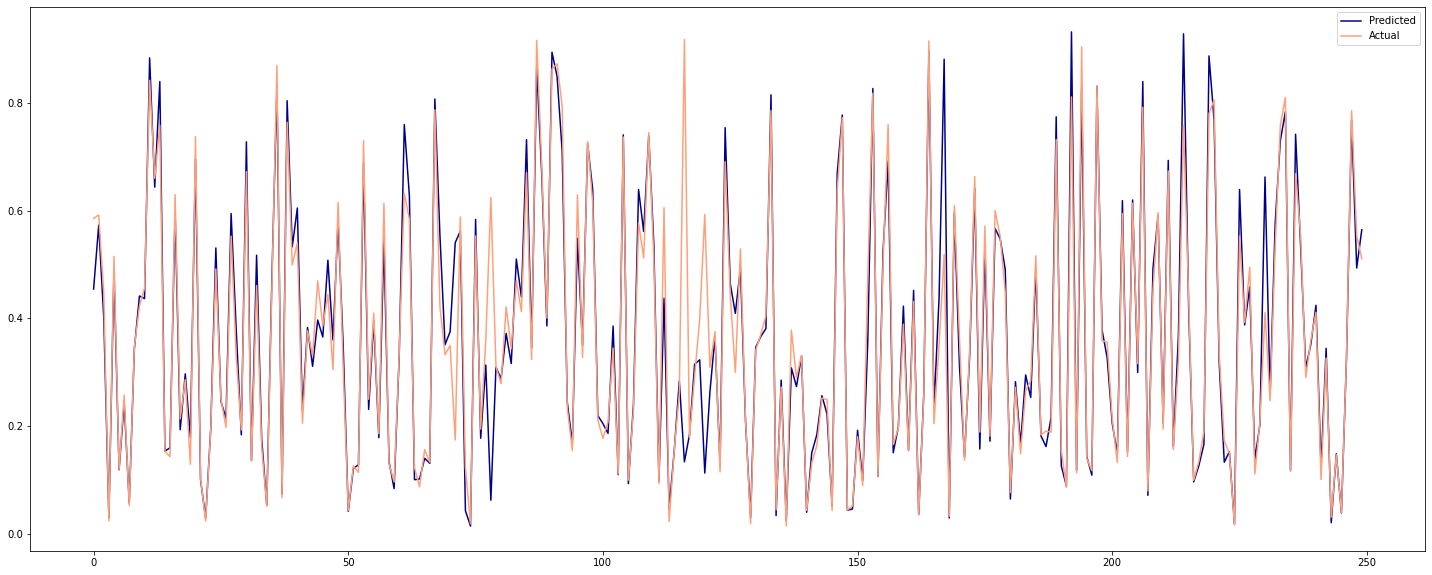

In [151]:
plt.figure(figsize=(25,10))
plt.plot(Y_pred_knr[:250], label='Predicted', color='darkblue', linewidth = 1.5)
plt.plot(Y_test[:250].values, label='Actual', color='lightsalmon', linewidth = 1.5)
plt.legend(loc='best')
plt.savefig('P1-K Neighbours Regressor Prediction')
plt.show()